> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# <font color=red> Project:  _A Brief Analysis of Liverpool Football Club and Steven Gerrard_
    
<h3 align="center">A comparison of Liverpool to that of their title rivals (Chelsea and Manchester United) and a look at Fifa's evaluation of Steven Gerrard and his midfield rival Frank Lampard of Chelsea from 2007 to 2016</h3>

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.


This report will examine two aspects of Liverpool Football Club (often referred to as LFC or LIV) and one comparison related to their legendary captain Steven Gerrard over nine seasons, starting in 2007-08 and running to the 2015-2016 season. It is available thanks to Udacity and this <a href="https://www.kaggle.com/hugomathien/soccer"><em>Kaggle Database</em></a>. Coicidentally, the data range available encompasses one of Liverpool's worst periods of the modern era, featuring limited team success, especially for such a historically decorated and respected English club. In fact, their only major trophy was a 2011-12 English Football League Cup (Carling Cup) victory over Cardiff Cup. 

This period saw five different managers take charge of LFC, starting with the twilight of one of the most prolific managers of Liverpool's modern era (<a href="https://en.wikipedia.org/wiki/Rafael_Ben%C3%ADtez"><em>Rafael Benítez</em></a>) and concluding with the dawn of a future Anfield legend's time with the Reds (<a href="https://en.wikipedia.org/wiki/J%C3%BCrgen_Klopp"><em>Jürgen Klopp</em></a>) in the Fall of 2015. These two bookend the horrible 7 months of <a href="https://en.wikipedia.org/wiki/Roy_Hodgson"><em>Roy Hodgson</em></a>, the second attempt as manager for <a href="https://en.wikipedia.org/wiki/Kenny_Dalglish"><em>Kenny Dalglish</em></a> and the somewhat improved results of <a href="https://en.wikipedia.org/wiki/Brendan_Rodgers"><em>Brendan Rodgers</em></a>. Dalglish captured one domestic cup victory and Rodgers had near success in winning the English Premier League(EPL). 

It is hard to not speak of this time period without a negative bias. Fans watched a European Champions League winning squad flounder, held together by Steven Gerrard alone for several years, until a combination of new owner's and Jurgen Klopp righted the ship. Though, how did the club really perform compared to its title rivals? Was it their style of play, their players, or something less tangible? Lastly, was Steven Gearrard rated better or worse than Frank Lampard based on FIFA's data? This report will aim to provide those comparisons in a clear, digestible manner. 

<br><div align="center">Regardless of the results, all you Reds know how to walk on!</div></br> <img src="liverpool-fc.jpg"
alt="Liverpool Logo"
width="200px" height="200px" style="float"/>

In [14]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from textwrap import wrap 
%matplotlib inline





<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
gerrard_data = pd.read_csv('gerrard_attributes.csv')
lampard_data = pd.read_csv('lampard_attributes.csv')
all_man_u_matches = pd.read_csv('man_u_matches.csv')
all_chel_matches = pd.read_csv('chelsea_matches.csv')
all_liv_matches = pd.read_csv('liverpool_matches.csv')

For the analysis of this giant football database, 5 datasets were collected from the larger kaggle database using SQLite. This was done to focus on the specific questions being posed and to efficiently slim the datasets, as there were almost 300 teams, nearly 26,000 matches and over 11,000 players in the database. Unfortunately, despite the large amount of data available, the database did not appear to include the necessary columns/keys to connect the match/team data to the player data (or at least not easily). That limits the ability to answer some questions which could have been posed regarding coorelations regarding the caliber of the player and their respective clubs performance. 

Match data and player data was selected based on the individual teams and players of interest, rather than selected simultaneously. This means that more data must be read into dataframes and analyzed in the notebook, but ultimately made it much easier to initially wrangle, clean, and explore the data. Also, the initial data was collected from the database with far more information than was ultimately used in the analysis. 

Let's first look at some basic information related to the two types of datafields which are being analyzed. 

In [16]:
print(gerrard_data.shape)
print(all_liv_matches.shape)

(36, 49)
(304, 7)


In [17]:
gerrard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    36 non-null     int64  
 1   player_api_id         36 non-null     int64  
 2   player_name           36 non-null     object 
 3   player_fifa_api_id    36 non-null     int64  
 4   birthday              36 non-null     object 
 5   height                36 non-null     float64
 6   weight                36 non-null     int64  
 7   id.1                  36 non-null     int64  
 8   player_fifa_api_id.1  36 non-null     int64  
 9   player_api_id.1       36 non-null     int64  
 10  date                  36 non-null     object 
 11  overall_rating        36 non-null     int64  
 12  potential             36 non-null     int64  
 13  preferred_foot        36 non-null     object 
 14  attacking_work_rate   36 non-null     object 
 15  defensive_work_rate   36 

In [18]:
all_liv_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   home_team_goal    304 non-null    int64 
 1   away_team_goal    304 non-null    int64 
 2   away_team_api_id  304 non-null    int64 
 3   home_team_api_id  304 non-null    int64 
 4   home_team         304 non-null    object
 5   season            304 non-null    object
 6   date              304 non-null    object
dtypes: int64(4), object(3)
memory usage: 16.8+ KB


From this information you learn two important facts about the data: 
1. The dataframes have the shape of 36x49 for player data and 304x7 for team match data
2. The dataframes do not have any null values. This also holds true to the three other similar datasets from the other players/teams that were not used as examples. 
3. It should be noted that the column '_home_team_' in the team datasets was created with a SQL query to display the home team for each match. 

This allows the wrangling phase to focus more on what data is needed to answer the questions posed, as opposed to how to fill in the blanks or drop columns due to insufficent data. 

Though, speaking of dropping columns, the player data for the Gerrard and Lampard datasets were not pulled from the database with a clear idea of the question which was going to be asked. 
``` mysql
SELECT *
FROM player as p
JOIN player_attributes as pa
ON p.player_api_id = pa.player_api_id
WHERE p.player_api_id = (relevant ID nubmer for Gerrard or Lampard)
```
As a result, the datasets have 49 columns, most of which are not relevant to the chosen analysis. These columns could have been dropped, 
``` python
gerrard_data.drop(['crossing', 'short_passing','gk_reflexes'...])
```
but it was more efficient to ignore the excess and create new dataframes focused on the information which may actually be used. 

The match/team datasets did not require any wrangling, as there were no nulls and the columns were selected from the dataset with a specific question in mind, but they did have a lot of cleaning ahead of them to help answer the question being posed. 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [19]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


#### Player dataset cleaning

The cleaning on the player datasets took place in two steps:

1. Adjust the date element to a datetime value
2. Create the smaller df for each player which contains only the relevant data


Here is step one:

In [20]:
gerrard_data['date'] = pd.to_datetime(gerrard_data['date'], errors='coerce')
lampard_data['date'] = pd.to_datetime(lampard_data['date'], errors='coerce')

_The coercing of errors is to force-clean the data as it is converted using Datetime package._

And here is step two:

In [21]:
gerrard_avg = gerrard_data.groupby([gerrard_data['date'].dt.year])[['overall_rating', 'potential']].mean()
lampard_avg = lampard_data.groupby([lampard_data['date'].dt.year])[['overall_rating', 'potential']].mean()

Step two first grouped the data by year based on the '_date_' column and then provided the mean (average) of the '_overall_rating_' and '_potential_' columns for the new dataframes. The two, new player dataframes have been created and are ready to be used in the analysis.

#### Match/team dataset cleaning

Now, the more intensive data cleaning begins. The match/team data for Liverpool, Chelsea, and Manchester United provided a lot of information, but did not include some very data required to answer the question being posed. Almost shockingly, despite including the number of home and away goals in each match, the database did not indicate which team won each game. So, data was pulled form the database which would hopefully be able to be cleaned and analyzed to provide the desired insights.

1. As previously indicated, the database did not have data related to the result (Win, loss, draw/tie) or who won/lost. The first step towards creating this data involved creating a new column which displayed the goal difference of each game

In [22]:
all_liv_matches['goal_difference'] = all_liv_matches['home_team_goal'] - all_liv_matches['away_team_goal']
all_liv_matches.head()

,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference
0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1
1,1,0,8462,8650,Liverpool,2008/2009,2008-10-29 00:00:00,1
2,2,1,8650,8586,Tottenham Hotspur,2008/2009,2008-11-01 00:00:00,1
3,3,0,8659,8650,Liverpool,2008/2009,2008-11-08 00:00:00,3
4,0,2,8650,8559,Bolton Wanderers,2008/2009,2008-11-15 00:00:00,-2


In [23]:
all_chel_matches['goal_difference'] = all_chel_matches['home_team_goal'] - all_chel_matches['away_team_goal']
all_man_u_matches['goal_difference'] = all_man_u_matches['home_team_goal'] - all_man_u_matches['away_team_goal']

Great, the a column now displays the difference in goals of each match. However, this information is only useful if we were only loooking at home matches where a positive goal difference always meant a win. That is not the case with this data, so both home and away matches need to be addressed. 

First, let's create two new dataframes of the same data, except one will feature only home matches and the other away matches.

In [40]:
l_home_games = all_liv_matches[all_liv_matches['home_team'] == "Liverpool"].reset_index()
l_home_games.head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference
0,1,1,0,8462,8650,Liverpool,2008/2009,2008-10-29 00:00:00,1
1,3,3,0,8659,8650,Liverpool,2008/2009,2008-11-08 00:00:00,3
2,5,0,0,9879,8650,Liverpool,2008/2009,2008-11-22 00:00:00,0
3,6,0,0,8654,8650,Liverpool,2008/2009,2008-12-01 00:00:00,0
4,8,2,2,8667,8650,Liverpool,2008/2009,2008-12-13 00:00:00,0


In [41]:
m_home_games = all_man_u_matches[all_man_u_matches['home_team'] == "Manchester United"].reset_index()
c_home_games = all_chel_matches[all_chel_matches['home_team'] == "Chelsea"].reset_index()

In [42]:
l_away_games = all_liv_matches[all_liv_matches['home_team'] != "Liverpool"].reset_index()
l_away_games.head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference
0,0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1
1,2,2,1,8650,8586,Tottenham Hotspur,2008/2009,2008-11-01 00:00:00,1
2,4,0,2,8650,8559,Bolton Wanderers,2008/2009,2008-11-15 00:00:00,-2
3,7,1,3,8650,8655,Blackburn Rovers,2008/2009,2008-12-06 00:00:00,-2
4,9,1,1,8650,9825,Arsenal,2008/2009,2008-12-21 00:00:00,0


In [43]:
c_away_games = all_chel_matches[all_chel_matches['home_team'] != "Chelsea"].reset_index()
m_away_games = all_man_u_matches[all_man_u_matches['home_team'] != "Manchester United"].reset_index()

Great! The matches have been divided into home and away dataframes. However, there is still no answer as to whether the goal difference indidcates a win or not. Thankfully, two simple _for loops_ can help provide this information. 

Step 2: Iterate over the _goal_difference_ column, determine the result based on the difference (based on whether the subject team is away or home), and append that information to a new column

In [44]:
l_h_result = []

for gd in l_home_games['goal_difference']:
    if gd > 0:
        l_h_result.append('W')
    elif gd < 0:
        l_h_result.append('L')
    elif gd == 0:
        l_h_result.append('D/T')

l_home_games['result'] = l_h_result
l_home_games.head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference,result
0,1,1,0,8462,8650,Liverpool,2008/2009,2008-10-29 00:00:00,1,W
1,3,3,0,8659,8650,Liverpool,2008/2009,2008-11-08 00:00:00,3,W
2,5,0,0,9879,8650,Liverpool,2008/2009,2008-11-22 00:00:00,0,D/T
3,6,0,0,8654,8650,Liverpool,2008/2009,2008-12-01 00:00:00,0,D/T
4,8,2,2,8667,8650,Liverpool,2008/2009,2008-12-13 00:00:00,0,D/T


In [45]:
l_a_result = []

for gd in l_away_games['goal_difference']:
    if gd > 0:
        l_a_result.append('L')
    elif gd < 0:
        l_a_result.append('W')
    elif gd == 0:
        l_a_result.append('D/T')
        
l_away_games['result'] = l_a_result
l_away_games.head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference,result
0,0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1,W
1,2,2,1,8650,8586,Tottenham Hotspur,2008/2009,2008-11-01 00:00:00,1,L
2,4,0,2,8650,8559,Bolton Wanderers,2008/2009,2008-11-15 00:00:00,-2,W
3,7,1,3,8650,8655,Blackburn Rovers,2008/2009,2008-12-06 00:00:00,-2,W
4,9,1,1,8650,9825,Arsenal,2008/2009,2008-12-21 00:00:00,0,D/T


Same thing for the Machester United matches.

In [46]:
m_h_result = []

for gd in m_home_games['goal_difference']:
    if gd > 0:
        m_h_result.append('W')
    elif gd < 0:
        m_h_result.append('L')
    elif gd == 0:
        m_h_result.append('D/T')

m_home_games['result'] = m_h_result

m_a_result = []

for gd in m_away_games['goal_difference']:
    if gd > 0:
        m_a_result.append('L')
    elif gd < 0:
        m_a_result.append('W')
    elif gd == 0:
        m_a_result.append('D/T')
        
m_away_games['result'] = m_a_result

And for the Chelsea matches.

In [47]:
c_h_result = []

for gd in c_home_games['goal_difference']:
    if gd > 0:
        c_h_result.append('W')
    elif gd < 0:
        c_h_result.append('L')
    elif gd == 0:
        c_h_result.append('D/T')

c_home_games['result'] = c_h_result

c_a_result = []

for gd in c_away_games['goal_difference']:
    if gd > 0:
        c_a_result.append('L')
    elif gd < 0:
        c_a_result.append('W')
    elif gd == 0:
        c_a_result.append('D/T')
        
c_away_games['result'] = c_a_result

Excellent. The two sub-dataframes for each team's away and home matches now tells displays the result for the teams of interest. Now, for cleanliness and efficiency sake, the data is merged back into one dataframe with the new columns present to indicate the result for every match, away or home.

In [48]:
liverpool_results= pd.concat([l_home_games, l_away_games], axis=0)
liverpool_results.sort_values('date', axis=0).head()

,index,home_team_goal,away_team_goal,away_team_api_id,home_team_api_id,home_team,season,date,goal_difference,result
0,0,0,1,8650,8472,Sunderland,2008/2009,2008-08-16 00:00:00,-1,W
6,11,2,1,8549,8650,Liverpool,2008/2009,2008-08-23 00:00:00,1,W
11,22,0,0,8650,10252,Aston Villa,2008/2009,2008-08-31 00:00:00,0,D/T
16,32,2,1,10260,8650,Liverpool,2008/2009,2008-09-13 00:00:00,1,W
17,33,0,0,10194,8650,Liverpool,2008/2009,2008-09-20 00:00:00,0,D/T


In [49]:
chelsea_results= pd.concat([c_home_games, c_away_games], axis=0)
manchester_united_results= pd.concat([m_home_games, m_away_games], axis=0)

The data for each team's matches have now been cleaned and updated to include the result of each match. 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: Which team performed better over the period of time the database examines(2008/09 to 2015/16?

First, lets look at the overall results for each season for each team.

In [54]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
liverpool_seasons = pd.crosstab(liverpool_results['season'], liverpool_results['result'])

In [64]:
manchester_united_seasons = pd.crosstab(manchester_united_results['season'], manchester_united_results['result'])
chelsea_seasons = pd.crosstab(chelsea_results['season'], chelsea_results['result'])

In [72]:
liverpool_seasons

result,D/T,L,W
season,,,
2008/2009,11,2,25
2009/2010,9,11,18
2010/2011,7,14,17
2011/2012,10,14,14
2012/2013,13,9,16
2013/2014,6,6,26
2014/2015,8,12,18
2015/2016,12,10,16


In [59]:
manchester_united_seasons

result,D/T,L,W
season,,,
2008/2009,6,4,28
2009/2010,4,7,27
2010/2011,11,4,23
2011/2012,5,5,28
2012/2013,5,5,28
2013/2014,7,12,19
2014/2015,10,8,20
2015/2016,9,10,19


In [60]:
chelsea_seasons

result,D/T,L,W
season,,,
2008/2009,8,5,25
2009/2010,5,6,27
2010/2011,8,9,21
2011/2012,10,10,18
2012/2013,9,7,22
2013/2014,7,6,25
2014/2015,9,3,26
2015/2016,14,12,12


Now, it is fairly clear from a glance at each team's record that Chelsea and Manchester United outperformed liverpool, but how consistently? Which of these teams regularly won half or more of their games each season?

In [144]:
liverpool_seasons.groupby('season')['W'].sum() >= 19

season
2008/2009     True
2009/2010    False
2010/2011    False
2011/2012    False
2012/2013    False
2013/2014     True
2014/2015    False
2015/2016    False
Name: W, dtype: bool

In [145]:
chelsea_seasons.groupby('season')['W'].sum() >= 19

season
2008/2009     True
2009/2010     True
2010/2011     True
2011/2012    False
2012/2013     True
2013/2014     True
2014/2015     True
2015/2016    False
Name: W, dtype: bool

In [146]:
manchester_united_seasons.groupby('season')['W'].sum() >= 19

season
2008/2009    True
2009/2010    True
2010/2011    True
2011/2012    True
2012/2013    True
2013/2014    True
2014/2015    True
2015/2016    True
Name: W, dtype: bool

Wow! Over those 8 seasons Liverpool only won 19 or more matches two times! Meanwhile, Chelsea did it 6/8 seasons and United accomplished it every season! The image is clearing up and it does not look good for Liverpool. Though, a visual examination of the number of wins will truly put this information the proper perspective.

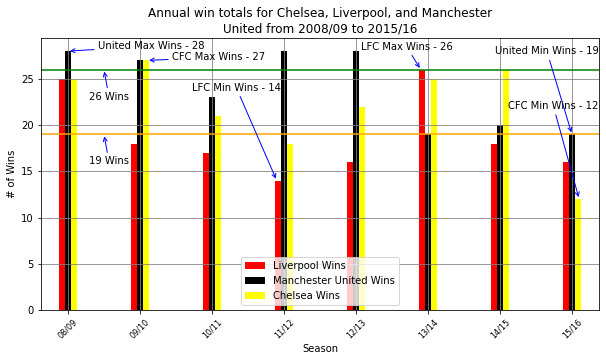

In [303]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.25
season = ['08/09', '09/10', '10/11', '11/12', '12/13', '13/14', '14/15', '15/16']

liverpool_wins = liverpool_seasons.groupby('season')['W'].sum().reset_index()
lfc_wins = liverpool_wins['W']
lfc_wins.name = 'Liverpool Wins'
united_wins = manchester_united_seasons.groupby('season')['W'].sum().reset_index()
man_u_wins = united_wins['W']
man_u_wins.name = 'Manchester United Wins'
chelsea_wins = chelsea_seasons.groupby('season')['W'].sum().reset_index()
cfc_wins = chelsea_wins['W']
cfc_wins.name = 'Chelsea Wins'

wins = pd.concat([lfc_wins, man_u_wins, cfc_wins], axis=1)

title = ax.set_title("\n".join(wrap("Annual win totals for Chelsea, Liverpool, and Manchester United from 2008/09 to 2015/16", 60)))

wins.plot.bar(width=width, ax=ax, color=('red', 'black', 'yellow'), use_index=True).grid(b=True, which='both', axis='both', color='gray')


ax.legend(['Liverpool Wins', 'Manchester United Wins', 'Chelsea Wins'], loc=8)

ax.annotate('United Max Wins - 28',
           xy=(0, 28), xycoords='data',
            xytext=(30, 2), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('CFC Max Wins - 27',
           xy=(1.1, 27), xycoords='data',
            xytext=(25, 0), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('LFC Max Wins - 26',
           xy=(4.9, 26), xycoords='data',
            xytext=(-60, 20), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('United Min Wins - 19',
           xy=(7, 19), xycoords='data',
            xytext=(-77, 80), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('CFC Min Wins - 12',
           xy=(7.1, 12), xycoords='data',
            xytext=(-71, 90), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('LFC Min Wins - 14',
           xy=(2.9, 14), xycoords='data',
            xytext=(-85, 90), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))

plt.axhline(y=19, color='orange')
ax.annotate('19 Wins',
           xy=(0.5, 19), xycoords='data',
            xytext=(-15, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='blue'))

plt.axhline(y=26, color='green')
ax.annotate('26 Wins',
           xy=(0.5, 26), xycoords='data',
            xytext=(-15, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='blue'))

plt.tick_params(axis='x', which='major', labelsize=8, rotation=45)
ax.set_xticklabels(season)
ax.set_xlabel('Season')
ax.set_ylabel('# of Wins')

plt.show()

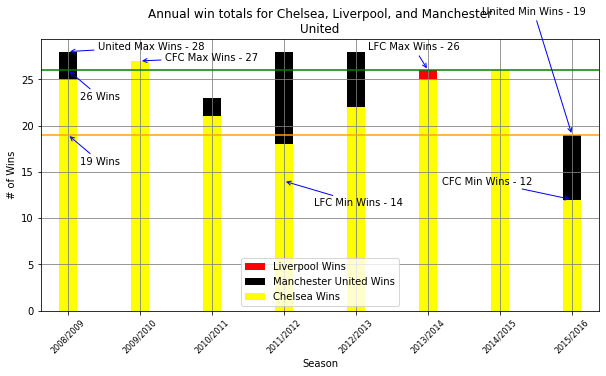

In [183]:
fig, ax = plt.subplots(figsize=(10,5))
width = 0.25
ind = np.arange(len(liverpool_seasons))
liverpool_wins = liverpool_seasons.groupby('season')['W'].sum()
man_u_wins = manchester_united_seasons.groupby('season')['W'].sum()
chelsea_wins = chelsea_seasons.groupby('season')['W'].sum()

title = ax.set_title("\n".join(wrap("Annual win totals for Chelsea, Liverpool, and Manchester United", 60)))

liverpool_seasons.plot.bar(y=['W'], width=width, ax=ax, color=('red'), use_index=True)

manchester_united_seasons.plot.bar(y=['W'], width=width, ax=ax, color=('black'), use_index=True)

chelsea_seasons.plot.bar(y=['W'], width=width, ax=ax, color=('yellow'), use_index=True).grid(b=True, which='both', axis='both', color='gray')

ax.legend(['Liverpool Wins', 'Manchester United Wins', 'Chelsea Wins'], loc=8)

ax.annotate('United Max Wins - 28',
           xy=(0, 28), xycoords='data',
            xytext=(30, 2), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('CFC Max Wins - 27',
           xy=(1, 27), xycoords='data',
            xytext=(25, 0), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('LFC Max Wins - 26',
           xy=(5, 26), xycoords='data',
            xytext=(-60, 20), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('United Min Wins - 19',
           xy=(7, 19), xycoords='data',
            xytext=(-90, 120), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('CFC Min Wins - 12',
           xy=(7, 12), xycoords='data',
            xytext=(-130, 15), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))
ax.annotate('LFC Min Wins - 14',
           xy=(3, 14), xycoords='data',
            xytext=(30, -25), textcoords='offset points',
           arrowprops=dict(arrowstyle="->", color='blue'))

plt.axhline(y=19, color='orange')
ax.annotate('19 Wins',
           xy=(0, 19), xycoords='data',
            xytext=(12, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='blue'))

plt.axhline(y=26, color='green')
ax.annotate('26 Wins',
           xy=(0, 26), xycoords='data',
            xytext=(12, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color='blue'))

plt.tick_params(axis='x', which='major', labelsize=8, rotation=45)
ax.set_xlabel('Season')
ax.set_ylabel('# of Wins')

plt.show()

All of the preceding wrangling, cleaning, and analyzing results in this graph which details the total wins(generally a good indicator of the success of a season) for Liverpool, Chelsea, and Manchester United. The graph does not paint a pretty picture for Liverpool. The chart clearly shows how Chelsea and especially Manchester United were substantially more consistent and successful during this time period. 

Now this data was not available from the database, but it should be noted that Manchester United won the league in 2008-09, 2010-11, and 2012-13 and Chelsea won the league in 2009-10 and 2014-15. Winning the the league is more complicated than win totals alone, as seen in 2009-10 when Chelsea and United won the same number of games, but Chelsea won the league. However, it does help to frame a season as a success or failure. Suffice to say Liverpool did not perform nearly as well as two of its main rivals during the database time period of 08/09-15/16.

### Research Question 2: Who was annually rated higher by FIFA, Steven Gerrard or Frank Lampard?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!